In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
# load data
train_data = pd.read_csv("train.csv")

In [153]:
# get information what is inside the train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

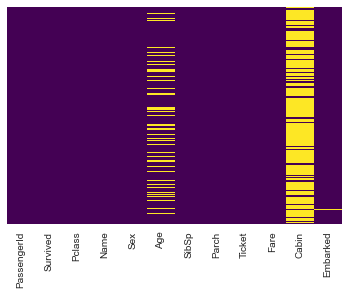

In [154]:
#whether the data is null, from the figure, we know that there is a lot of missingdata in cabin column, and 20% missing
# data in age column
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [155]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Survived', ylabel='count'>

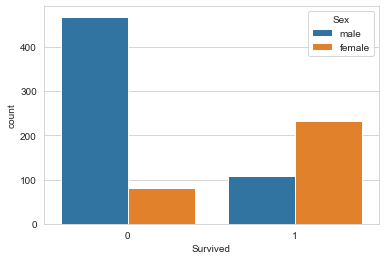

In [156]:
# see the amount of survived people and unsurvived people based on sex
sns.countplot(x="Survived", hue = "Sex", data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

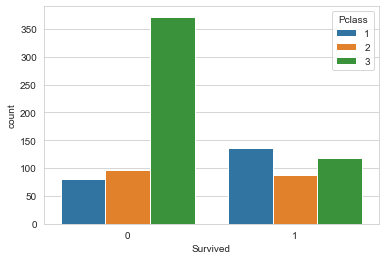

In [157]:
# see the amount of survived people and unsurvived people based on passenger class
sns.countplot(x="Survived", hue = "Pclass", data = train_data)

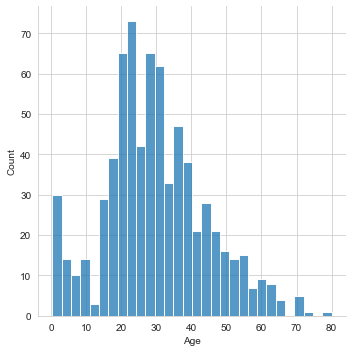

In [158]:
# see the age distribution
sns.displot(train_data["Age"].dropna(), kde = False, bins = 30)

In [159]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

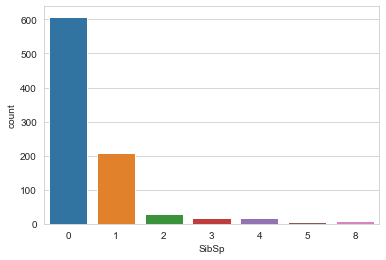

In [160]:
sns.countplot(x = "SibSp" ,data = train_data)

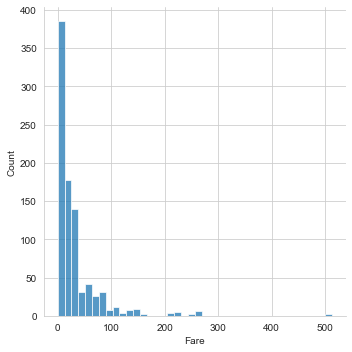

In [161]:
sns.displot(train_data["Fare"], bins = 40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

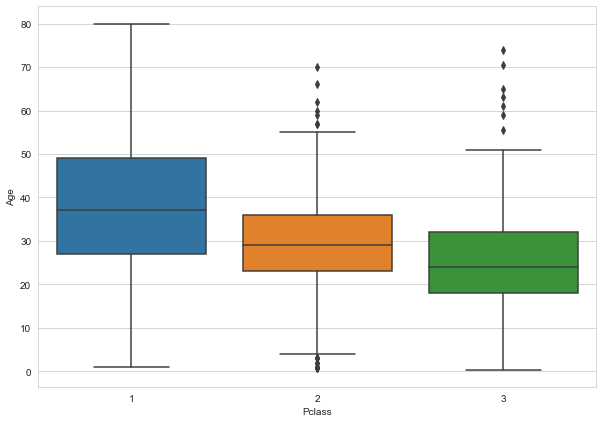

In [162]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "Pclass", y = "Age", data = train_data)

In [163]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [164]:
train_data["Age"] = train_data[["Age", "Pclass"]].apply(impute_age, axis = 1)

In [165]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

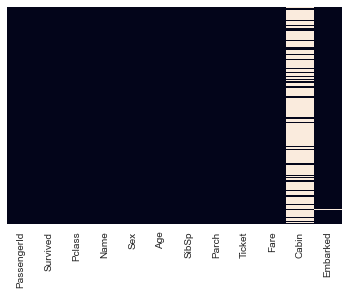

In [166]:
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False)

In [167]:
train_data.drop("Cabin", axis = 1 ,inplace = True)

In [168]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [169]:
train_data.dropna(inplace = True)

In [170]:
sex = pd.get_dummies(train_data["Sex"], drop_first = True)

In [171]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [172]:
embark = pd.get_dummies(train_data["Embarked"],drop_first = True)

In [173]:
train_data = pd.concat([train_data, sex, embark], axis = 1)

In [174]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [175]:
train_data.drop(["Sex", "Embarked", "Name", "Ticket"], axis = 1, inplace = True)

In [176]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [177]:
train_data.drop("PassengerId", axis = True, inplace = True)

In [178]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [179]:
# train data
x = train_data.drop("Survived", axis = 1)
y = train_data["Survived"]

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [182]:
#create model
from sklearn.linear_model import LogisticRegression

In [183]:
logModel = LogisticRegression()

In [184]:
logModel.fit(X_train, y_train)

/Users/mingfanghu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [185]:
prediction = logModel.predict(X_test)
print(prediction)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1]


In [186]:
from sklearn.metrics import roc_auc_score,roc_curve

In [187]:
predict_prob = logModel.predict_proba(X_test)

In [188]:
auc = roc_auc_score(y_test, predict_prob[:, 1])
print(auc)

0.8659450212364322


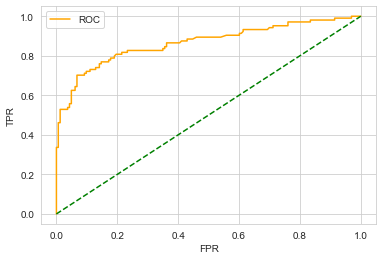

In [189]:
fpr, tpr, threshold = roc_curve(y_test, predict_prob[:, 1])
plt.plot(fpr, tpr, color = "orange", label = "ROC")
plt.plot([0,1], [0, 1], color = "green", linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

In [200]:
# l1 regulazation
logModel_l1 = LogisticRegression(penalty = "l1", C = 4, solver = "liblinear")


In [201]:
# use cross validation to find the best lambda for this model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logModel_l1, X_train, y_train, cv=5)
print("the accuracy is ", np.mean(scores))

the accuracy is  0.7958709677419354


In [202]:
logModel_l1.fit(X_train_l1, y_train)

LogisticRegression(C=4, penalty='l1', solver='liblinear')

In [203]:
prediction_proba_l1 = logModel_l1.predict_proba(X_test_l1)

In [204]:
auc_l1 = roc_auc_score(y_test, prediction_proba_l1[:, 1])

In [205]:
print("auc after l1 regilazation is ", auc_l1)

auc after l1 regilazation is  0.8672428032090609


In [218]:
# l2 regulazation
logModel_l2 = LogisticRegression(penalty = "l2", C = 4, solver = "liblinear")

In [220]:
# use cross validation to find the best lambda for this model
scores_l2 = cross_val_score(logModel_l2, X_train, y_train, cv=5)
print("the accuracy for logistic regression for ridge penalty is ", np.mean(scores_l2))

the accuracy for logistic regression for ridge penalty is  0.7958709677419356


In [221]:
logModel_l2.fit(X_train, y_train)

LogisticRegression(C=4, solver='liblinear')

In [222]:
prediction_proba_l2 = logModel_l2.predict_proba(X_test)

In [223]:
auc_l2 = roc_auc_score(y_test, prediction_proba_l2[:, 1])

In [224]:
print("auc after l2 regilazation is ", auc_l2)

auc after l2 regilazation is  0.8673607833883907
